feature: tensor([-0.4081,  1.4258]) 
label: tensor([-1.4709])


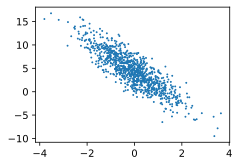

In [2]:
import random
import torch
from d2l import torch as d2l


def synthetic_data(w, b, num_examples):
    X = torch.normal(0, 1, (num_examples, len(w)))#len(w)为列数
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))


true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

print('feature:',features[0],'\nlabel:',labels[0])
d2l.set_figsize()
d2l.plt.scatter(features[:,1].detach().numpy(),
                labels.detach().numpy(),1)

In [3]:
def data_iter(batch_size,features,labels):
    num_examples=len(features)
    indices=list(range(num_examples))
    random.shuffle(indices)
    for i in range(0,num_examples,batch_size):
        batch_indices=torch.tensor(
            indices[i:min(i+batch_size,num_examples)]
        )
        yield features[batch_indices],labels[batch_indices]
batch_size=10
for X,y in data_iter(batch_size,features,labels):
    print(X,'\n',y)

tensor([[-0.7324, -0.1530],
        [-0.4061, -0.6737],
        [-0.4238,  0.7351],
        [ 1.7943,  3.6488],
        [ 0.4358, -0.8749],
        [ 0.1547,  0.7736],
        [ 1.0778,  0.2353],
        [-0.4869,  0.9230],
        [-0.7214,  0.9321],
        [ 0.3438, -0.2280]]) 
 tensor([[ 3.2490],
        [ 5.6670],
        [ 0.8503],
        [-4.6220],
        [ 8.0394],
        [ 1.8741],
        [ 5.5551],
        [ 0.0874],
        [-0.4226],
        [ 5.6605]])
tensor([[ 4.0209e-01, -1.1509e-01],
        [-5.7971e-01, -3.0508e-02],
        [ 4.8557e-01, -7.0245e-01],
        [ 1.4229e-01, -3.1996e+00],
        [-4.8184e-01,  3.1490e-01],
        [-1.4452e-01, -1.6524e-01],
        [ 5.4550e-01, -1.2191e+00],
        [-1.4876e+00,  1.5246e+00],
        [ 1.3175e+00, -3.9182e-01],
        [ 5.7018e-01,  2.3304e-03]]) 
 tensor([[ 5.3876],
        [ 3.1408],
        [ 7.5543],
        [15.3672],
        [ 2.1707],
        [ 4.4754],
        [ 9.4415],
        [-3.9519],
        [ 8